In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Reshape, Dropout, LSTM, RepeatVector, TimeDistributed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

In [3]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [5]:
train.isnull().sum().sum()

137546

In [0]:
train.fillna(train.mean(),inplace=True)
train.fillna(train.mode().iloc[0],inplace=True)

test.fillna(test.mean(),inplace=True)
test.fillna(test.mode().iloc[0],inplace=True)

In [0]:
# imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# imp.fit_transform(train)

In [8]:
train.isnull().sum().sum()

0

In [9]:
train.shape

(131662, 14)

In [0]:
#train.dropna(inplace=True)

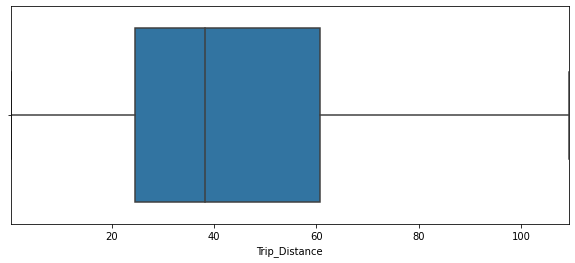

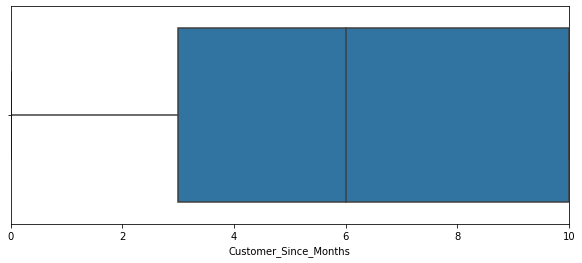

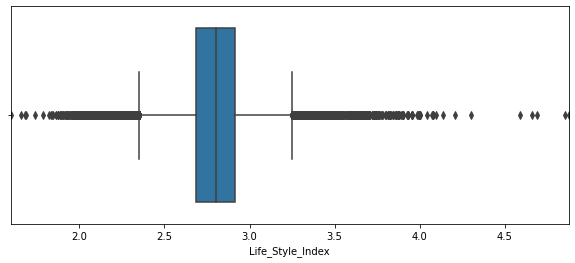

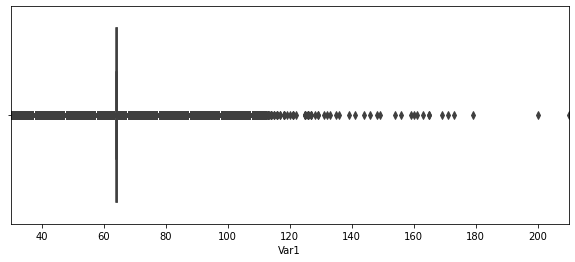

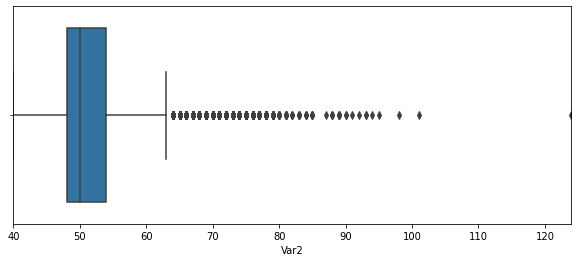

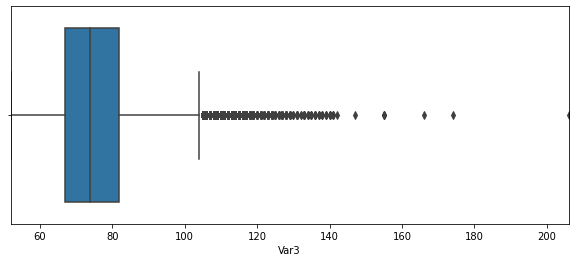

In [11]:
for col in ["Trip_Distance","Customer_Since_Months","Life_Style_Index","Var1","Var2","Var3"]:
  plt.figure(figsize=(10,4))
  plt.xlim(train[col].min(), train[col].max())
  sns.boxplot(x=train[col])

In [0]:
# train = train[train['Life_Style_Index']<4.8]
train = train[train['Var1']<200]
train = train[train['Var2']<120]
train = train[train['Var3']<2000]

In [13]:
train.shape

(131659, 14)

In [0]:
le = LabelEncoder()
train["Type_of_Cab_label"] = le.fit_transform(train.Type_of_Cab)
train = train.drop('Type_of_Cab',axis=1)

le = LabelEncoder()
test["Type_of_Cab_label"] = le.fit_transform(test.Type_of_Cab)
test = test.drop('Type_of_Cab',axis=1)

In [0]:
le = LabelEncoder()
train["Confidence_Life_Style_Index_label"] = le.fit_transform(train.Confidence_Life_Style_Index)
train = train.drop('Confidence_Life_Style_Index',axis=1)

le = LabelEncoder()
test["Confidence_Life_Style_Index_label"] = le.fit_transform(test.Confidence_Life_Style_Index)
test = test.drop('Confidence_Life_Style_Index',axis=1)

In [0]:
le = LabelEncoder()
train["Destination_Type_label"] = le.fit_transform(train.Destination_Type)
train = train.drop('Destination_Type',axis=1)

le = LabelEncoder()
test["Destination_Type_label"] = le.fit_transform(test.Destination_Type)
test = test.drop('Destination_Type',axis=1)

In [0]:
le = LabelEncoder()
train["Gender_label"] = le.fit_transform(train.Gender)
train = train.drop('Gender',axis=1)

le = LabelEncoder()
test["Gender_label"] = le.fit_transform(test.Gender)
test = test.drop('Gender',axis=1)

In [18]:
train.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_label,Confidence_Life_Style_Index_label,Destination_Type_label,Gender_label
0,T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,2,1,0,0,0
1,T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,2,1,1,0,1
2,T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,2,1,1,4,1
3,T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,3,2,1,0,1
4,T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,2,2,1,0,1


In [19]:
test.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_label,Confidence_Life_Style_Index_label,Destination_Type_label,Gender_label
0,T0005689459,9.44,10.0,2.57438,3.68000,2,63.93661,46,63,0,0,1,1
1,T0005689462,32.15,10.0,2.85143,1.59375,0,65.00000,49,80,1,0,0,0
2,T0005689463,10.38,4.0,2.70530,4.50500,0,63.93661,47,74,2,0,3,1
3,T0005689466,14.94,6.0,2.48159,4.53000,0,63.00000,43,54,1,2,4,1
4,T0005689468,32.03,7.0,2.81598,4.60125,3,96.00000,44,56,1,0,10,1


In [20]:
train.Surge_Pricing_Type.unique()

array([2, 3, 1])

In [0]:
X = train.copy()
y = X['Surge_Pricing_Type']
X = X.drop(['Surge_Pricing_Type','Trip_ID'],axis=1)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=18)

In [0]:
test = test.drop(['Trip_ID'],axis=1)

Random Forest

In [0]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
model.fit(X_train,y_train)

Logistic Regression

In [0]:
# model = LogisticRegression(random_state=42,solver = 'liblinear').fit(X_train, y_train)

Decision Tree Classifier

In [0]:
# model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=9, max_features='auto',
#                        max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_weight_fraction_leaf=0.0,
#                        random_state=42)
# model.fit(X_train,y_train)

SVM

In [26]:
# model = SVC(kernel='rbf')
# model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

CNN

In [0]:
# model = Sequential()
# model.add(Reshape((1,X_train.shape[1],1)))
# model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same',
#              activation ='relu', input_shape = (1,X_train.shape[1],1)))
# model.add(Flatten())
# model.add(Dense (500, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(Dense (100, activation='tanh'))
# model.add(Dense (1, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',
#               metrics=['accuracy'])

In [0]:
# model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=1000, validation_data=(np.array(X_val),np.array(y_val)))

Predict

In [0]:
preds = model.predict(X_val)

In [31]:
accuracy_score(y_val, preds)

0.6459440984353638

In [0]:
preds = model.predict(test)

In [0]:
submission = sample_submission.copy()

In [0]:
submission['Surge_Pricing_Type'] = preds

In [0]:
submission.to_csv("submission.csv",index=False)